<a id='home'></a>
### purpose

Answer Q1 of the manuscript: How does the number of markers used as input affect performance?

### outline

1. [get results](#res)
1. [make figs](#figs)
    1. [performance by nloci by hue](#pbh)
    1. [performance by hue by nloci](#pbl)
    1. [1:1 performance comparisons between number of loci groups](#oto)

In [1]:
from pythonimports import *
import myfigs as mf

import MVP_summary_functions as mvp
import runtime_API as rt

import seaborn as sns
import itertools as it

fig_dir = makedir(f'{rt.resdir}/figures/00_Q1_effect_of_marker_set_size')

t0 = dt.now()  # notebook timer

rt.latest_commit()
session_info.show()

#########################################################
Today:	September 26, 2024 - 13:48:00 EDT
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit 6a767410e7b569adbf9df526de108f22ef50aad8  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Wed Mar 6 13:42:13 2024 -0700

Current commit of MVP_offsets:
commit 5ce82f4d655645237a0f4026fa32e220226dc373  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Thu May 16 13:02:58 2024 -0400

Current commit of MVP_runtime:
commit df87dd2c708ac0fdeebcfaaca239473ca2c487af  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Tue Mar 19 16:17:46 2024 -0400
#########################################################



In [2]:
fig_dir

'/work/lotterhos/brandon/runtime/figures/00_Q1_effect_of_marker_set_size'

<a id='res'></a>
# get results

[top](#home)

In [3]:
results = rt.load_results(ignore_20k=True)

results

removing records for models using 20k loci
ind shape = (162000, 17)
pooled shape = (162000, 17)
Function `load_results` completed after : 0-00:00:35


,garden,score,final_LA,glevel,plevel,pleio,slevel,landscape,popsize,migration,simulation_level,rep,num_loci,seed,demography,source,offset_level,seed_garden,final_la_bin
1231109_1_500,1,-0.561309,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_1,0.42 < LA ≤ 0.58
1231109_2_500,2,-0.621278,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_2,0.42 < LA ≤ 0.58
1231109_3_500,3,-0.681061,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_3,0.42 < LA ≤ 0.58
1231109_4_500,4,-0.728768,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_4,0.42 < LA ≤ 0.58
1231109_5_500,5,-0.755431,0.501332,highly-polygenic,2-trait,no pleiotropy,equal-S,Est-Clines,N-cline-center-to-edge,m-constant,highly-polygenic_2-trait_no pleiotropy_equal-S...,0-225,500,1231109,N-cline-center-to-edge_m-constant,ind,highly-polygenic_2-trait_no pleiotropy_equal-S...,1231109_5,0.42 < LA ≤ 0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231768_96_10000,96,-0.322035,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,450-675,10000,1231768,N-variable_m-variable,pooled,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,1231768_96,0.27 < LA ≤ 0.42
1231768_97_10000,97,-0.311476,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,450-675,10000,1231768,N-variable_m-variable,pooled,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,1231768_97,0.27 < LA ≤ 0.42
1231768_98_10000,98,-0.297263,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,450-675,10000,1231768,N-variable_m-variable,pooled,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,1231768_98,0.27 < LA ≤ 0.42
1231768_99_10000,99,-0.316349,0.382113,oligogenic,2-trait,pleiotropy,unequal-S,SS-Mtn,N-variable,m-variable,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,450-675,10000,1231768,N-variable_m-variable,pooled,oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...,1231768_99,0.27 < LA ≤ 0.42


In [4]:
for source in ['ind', 'pooled']:
    print(source, results[results.source == source].seed_garden.unique().__len__())

ind 54000
pooled 54000


In [5]:
results.seed.unique().__len__() == 180 * 3

True

In [6]:
len(results.num_loci.unique())

3

In [7]:
Counter(results.seed.value_counts().values)

Counter({600: 540})

<a id='figs'></a>
# make figs

[top](#home)

In [8]:
def cleanup_fig(g, source=None, hue=None, x=None, replace=None):
    """Make the figure look rully nice. Like, rully rully nice."""
    g.legend_.remove()

    g.axes.set_ylim(*rt.ylim)

    g.axes.set_xlabel(rt.factor_names[x], fontsize=13)

    g.axes.set_ylabel(rt.perf_label, fontsize=12)

    g.axes.axhline(0, **rt.hline_kwargs)

    mf.adjust_box_widths(g)

    mvp.jitter_fliers(axes=[g.axes])

    rt.add_legend(g.figure, color_by=hue, loc='center left', bbox_to_anchor=(1, 0.55))
    
    mvp.update_ticklabels(ax=g.axes, replace=replace, fontsize=12)
    
    g.axes.set_title(rt.factor_names[source]) # 'Individual-level' if source == 'ind' else 'Population-level')

    plt.tight_layout()
    
    pass

<a id='pbh'></a>
### performance by nloci by hue

[top](#home)

Saved to:  /work/lotterhos/brandon/runtime/figures/00_Q1_effect_of_marker_set_size/ind_performance_by_landscape.pdf


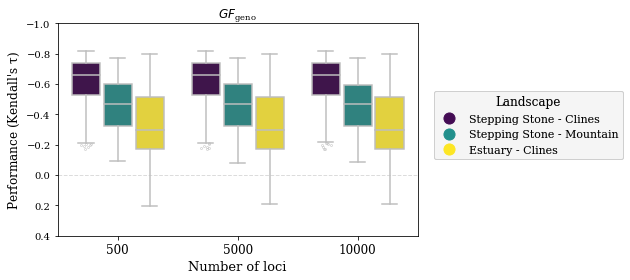

Saved to:  /work/lotterhos/brandon/runtime/figures/00_Q1_effect_of_marker_set_size/ind_performance_by_final_la_bin.pdf


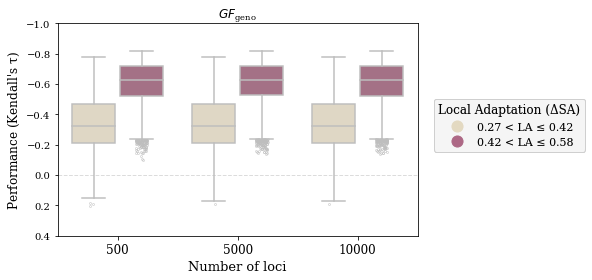

Saved to:  /work/lotterhos/brandon/runtime/figures/00_Q1_effect_of_marker_set_size/ind_performance_by_glevel.pdf


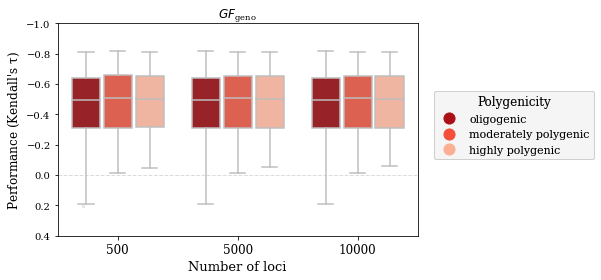

Saved to:  /work/lotterhos/brandon/runtime/figures/00_Q1_effect_of_marker_set_size/pooled_performance_by_landscape.pdf


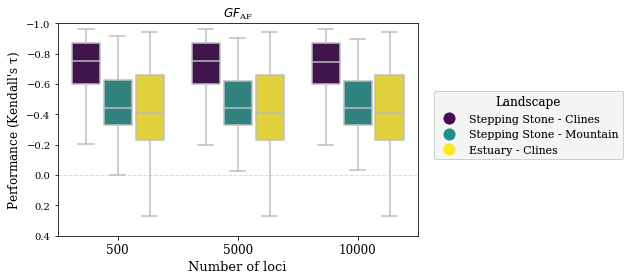

Saved to:  /work/lotterhos/brandon/runtime/figures/00_Q1_effect_of_marker_set_size/pooled_performance_by_final_la_bin.pdf


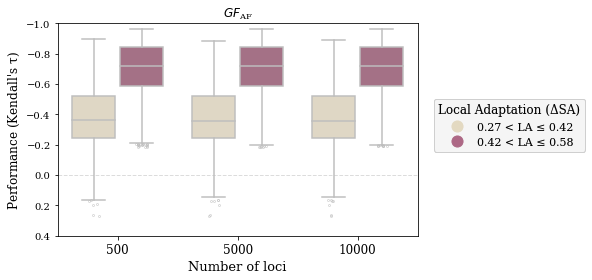

Saved to:  /work/lotterhos/brandon/runtime/figures/00_Q1_effect_of_marker_set_size/pooled_performance_by_glevel.pdf


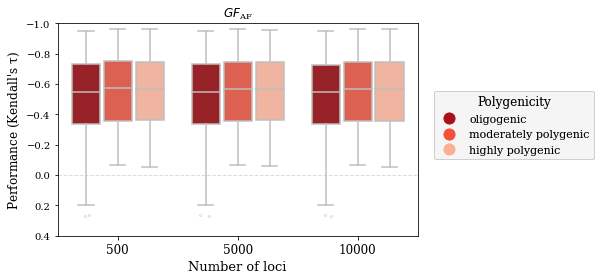

In [9]:
for source in results.source.unique():
    model = 'geno-model' if source == 'ind' else 'af-model'
    
    data = results[results.source == source].copy()

    for hue in ['landscape', 'final_la_bin', 'glevel']:
        g = sns.boxplot(
            data=data,
            y='score',
            x='num_loci',
            hue=hue,
            hue_order=rt.hue_order[hue],
            **rt.boxplot_kwargs
        )

        cleanup_fig(g, source=model, hue=hue, x='num_loci')

        mf.save_pdf(f'{fig_dir}/{source}_performance_by_{hue}.pdf')

        plt.show()

<a id='pbl'></a>
### performance by hue by nloci

[top](#home)

Saved to:  /work/lotterhos/brandon/runtime/figures/00_Q1_effect_of_marker_set_size/ind_performance_by_num_loci_by_landscape.pdf


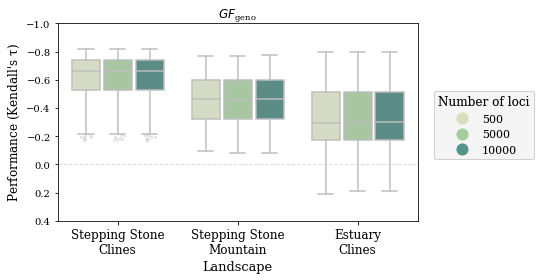

Saved to:  /work/lotterhos/brandon/runtime/figures/00_Q1_effect_of_marker_set_size/ind_performance_by_num_loci_by_final_la_bin.pdf


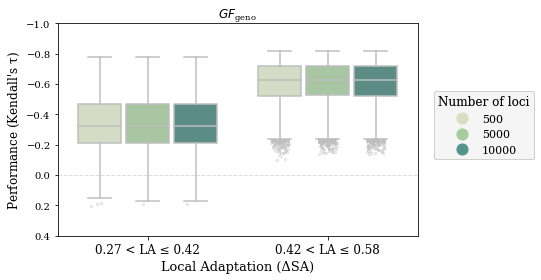

Saved to:  /work/lotterhos/brandon/runtime/figures/00_Q1_effect_of_marker_set_size/ind_performance_by_num_loci_by_glevel.pdf


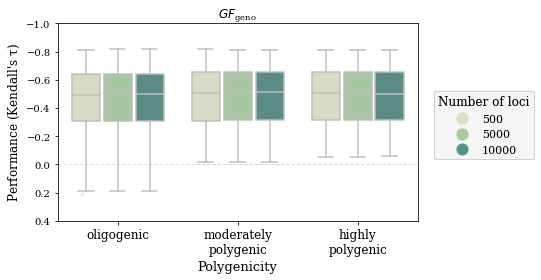

Saved to:  /work/lotterhos/brandon/runtime/figures/00_Q1_effect_of_marker_set_size/pooled_performance_by_num_loci_by_landscape.pdf


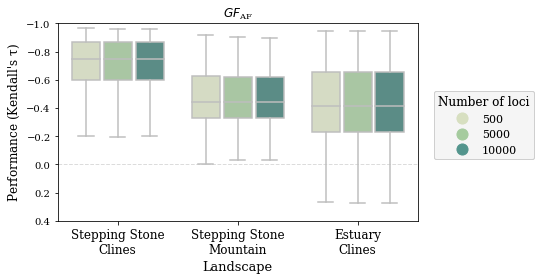

Saved to:  /work/lotterhos/brandon/runtime/figures/00_Q1_effect_of_marker_set_size/pooled_performance_by_num_loci_by_final_la_bin.pdf


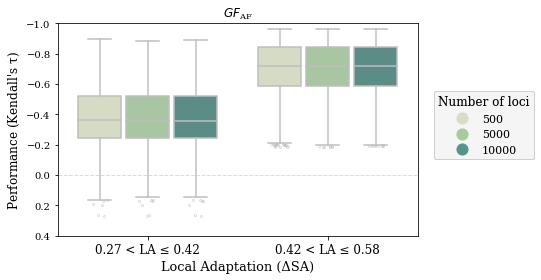

Saved to:  /work/lotterhos/brandon/runtime/figures/00_Q1_effect_of_marker_set_size/pooled_performance_by_num_loci_by_glevel.pdf


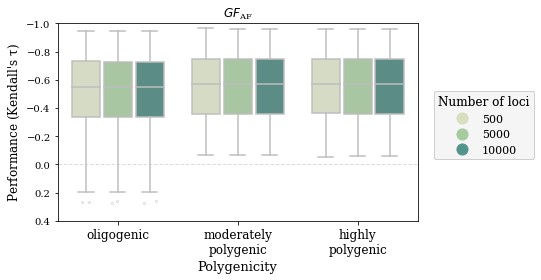

In [10]:
for source in results.source.unique():
    model = 'geno-model' if source == 'ind' else 'af-model'
    
    data = results[results.source == source].copy()

    for hue in ['landscape', 'final_la_bin', 'glevel']:
        g = sns.boxplot(
            data=data,
            y='score',
            x=hue,
            order=rt.hue_order[hue],
            hue='num_loci',
            hue_order=rt.hue_order['num_loci'],
            **rt.boxplot_kwargs
        )

        cleanup_fig(
            g,
            source=model,
            hue='num_loci',
            x=hue,
            replace=[(' - ', '\n'), (' poly', '\npoly')]
        )

        mf.save_pdf(f'{fig_dir}/{source}_performance_by_num_loci_by_{hue}.pdf')

        plt.show()

<a id='oto'></a>
### 1:1 performance comparisons between number of loci groups

[top](#home)

ind
Saved to:  /work/lotterhos/brandon/runtime/figures/00_Q1_effect_of_marker_set_size/ind_scatter.pdf


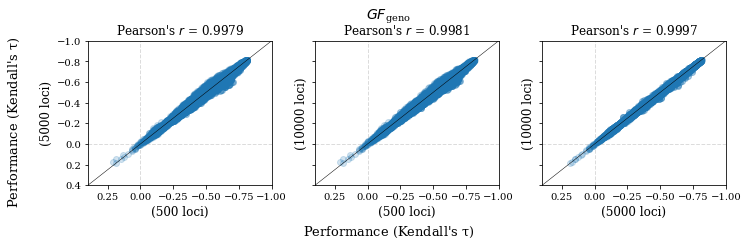

pooled
Saved to:  /work/lotterhos/brandon/runtime/figures/00_Q1_effect_of_marker_set_size/pooled_scatter.pdf


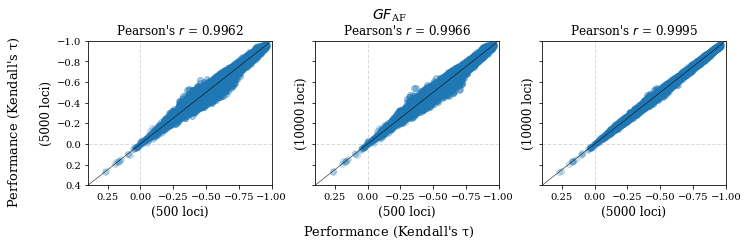

In [11]:
# make scatter plots

corrs = wrap_defaultdict(dict, 2)  # for heatmaps
all_corrs = []  # for min/max
for source in results.source.unique():
    print(ColorText(source).bold())
    
    model = 'geno-model' if source == 'ind' else 'af-model'
    
    data = results[results.source == source].copy()
    
    # pairwise comparisons between number of loci sets
    fig, axes = plt.subplots(ncols=3, sharey=True, sharex=True, figsize=(10, 3)); i=0
    
    for num_i, num_j in it.combinations(data.num_loci.unique(), r=2):
        idata = data[data.num_loci == num_i].copy()
        jdata = data[data.num_loci == num_j].copy()

        # get intersecting datasets (to handle 20k-loci failures at ind level)
        idata.index = idata.seed_garden.tolist()
        jdata.index = jdata.seed_garden.tolist()
        intersets = set(idata.seed_garden).intersection(jdata.seed_garden)

        # sort values in dataframe - no need to sort values
        idata = idata.loc[intersets]#.sort_values(by=['seed', 'garden'])  # two sorts avoid issue with leading zero: 1 vs 10 vs 100
        jdata = jdata.loc[intersets]#.sort_values(by=['seed', 'garden'])
        
        # calculate correlation
        corr = idata.score.corr(jdata.score, method='pearson')
        corrs[source][num_i][num_j] = corr
        all_corrs.append(corr)

        # create scatter plot
        ax = axes.flat[i]
        ax.scatter(idata.score, jdata.score, alpha=0.2)
        mf.draw_xy(ax=ax.axes, lims=rt.ylim)
        ax.axes.set_xlabel(f'({int(num_i)} loci)', fontsize=12)
        ax.axes.set_ylabel(f'({int(num_j)} loci)', fontsize=12)
        ax.axes.axhline(0, **rt.hline_kwargs)
        ax.axes.axvline(0, **rt.hline_kwargs)
        ax.axes.set_title("Pearson's $\itr$ = %s" % round(corr, 4), fontsize=12)
        
        i += 1
        
    plt.tight_layout()
    ax.figure.supylabel(rt.perf_label, fontsize=13, va='center', x=-0.03)
    ax.figure.supxlabel(rt.perf_label, fontsize=13, ha='center', y=-0.05)
    ax.figure.suptitle(rt.factor_names[model], fontsize=14, y=1.03, ha='center')
    mf.save_pdf(f'{fig_dir}/{source}_scatter.pdf')

    plt.show()


In [12]:
min(all_corrs)

0.9961600144073531

Saved to:  /work/lotterhos/brandon/runtime/figures/00_Q1_effect_of_marker_set_size/combined_sources_heatmap.pdf


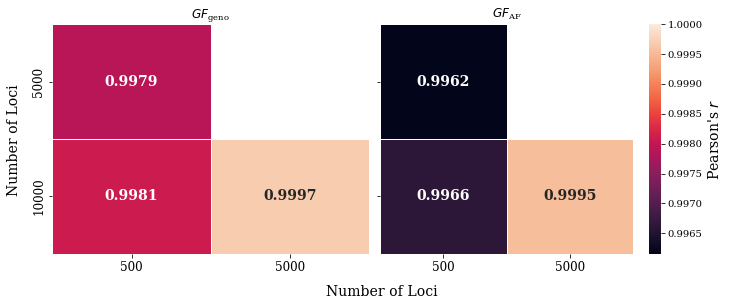

In [13]:
# make heat maps
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))

for i, source in enumerate(corrs):
    model = 'geno-model' if source == 'ind' else 'af-model'

    df = pd.DataFrame(corrs[source])
    
    ax = sns.heatmap(
        df,
        annot=True,
        linewidths=0.5,
        fmt='.4f',
        vmin=min(all_corrs),
        vmax=1.0,
        annot_kws=dict(weight='bold', fontsize=14),
        ax=axes[i],
        cbar=False if i == 0 else True
    )

    if i == 0:
        pass
    else:
        ax.collections[0].colorbar.set_label(r"Pearson's $\itr$", fontsize=14)
        
    ax.set_title(rt.factor_names[model])
    ax.tick_params(axis='both', labelsize=12)

plt.tight_layout()
fig.supylabel('Number of Loci\n', fontsize=14, x=-0.02)
fig.supxlabel('Number of Loci', fontsize=14, y=-0.05)

mf.save_pdf(f'{fig_dir}/combined_sources_heatmap.pdf')

plt.show()

In [14]:
formatclock(dt.now() - t0)

'0-00:00:53'